In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

dataset = load_iris()
X = dataset.data
y = dataset.target
y = np.asarray(y)
X.shape

(150, 4)

In [2]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0)

In [3]:
#OneHotEncoding
y_train = pd.get_dummies(y_train)
y_train = np.array(y_train)

y_test = pd.get_dummies(y_test)
y_test = np.array(y_test)

In [4]:
#Reshaping
X_train = np.transpose(X_train)
y_train = np.transpose(y_train)
X_test = np.transpose(X_test)
y_test = np.transpose(y_test)


In [5]:
X.shape

(150, 4)

In [6]:
y.shape

(150,)

In [7]:
#Initializing weights
def initialize_params(layer_dims):
    parameters = {}
    for l in range(1,len(layer_dims)):
        parameters['W'+str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1])
        parameters['b'+str(l)] = np.random.randn(layer_dims[l],1)
        
    return parameters

In [8]:
parameters = initialize_params([4,5,5,3])


In [9]:
J = 0
m_train = X_train.shape[1]
assert (m_train == 112)
alpha = 0.033
q = []

In [10]:
def softmax(x):
    return np.exp(x)/sum(np.exp(x))

In [11]:
#Full Connection ----- TRAINING SET
#Forward Propagation
parameters['A0'] = X_train
for s in range(60):
    for i in range(1,3):
        parameters['Z'+str(i)] = np.dot(parameters['W'+str(i)],parameters['A'+str(i-1)]) + parameters['b'+str(i)]
        parameters['A'+str(i)] = np.tanh(parameters['Z'+str(i)])

    parameters['Z'+str(3)] = np.dot(parameters['W'+str(3)],parameters['A'+str(2)]) + parameters['b'+str(3)]
    parameters['A'+str(3)] = softmax(parameters['Z3'])
    #Calculating cost function
    J = -(1/m_train) * sum(sum(y_train * np.log(parameters['A'+str(3)])))
    q.append(J)
    
    print('Iteration '+str(s)+' : '+str(J))

    #Back Propagation
    parameters['dZ'+str(3)] = parameters['A'+str(3)] - y_train
    parameters['dW'+str(3)] = (1/m_train)*np.dot(parameters['dZ'+str(3)],parameters['A'+str(2)].T)
    parameters['db'+str(3)] = (1/m_train)*np.sum(parameters['dZ'+str(3)], axis = 1, keepdims = True)
    parameters['dA'+str(2)] = np.dot(parameters['W'+str(3)].T,parameters['dZ'+str(3)])

    for j in [2,1]:
        parameters['dZ'+str(j)] = parameters['dA'+str(j)] * (1-np.power(parameters['A'+str(j)],2))
        parameters['dW'+str(j)] = (1/m_train)*np.dot(parameters['dZ'+str(j)],parameters['A'+str(j-1)].T)
        parameters['db'+str(j)] = (1/m_train)*np.sum(parameters['dZ'+str(j)],axis = 1, keepdims = True)
        parameters['dA'+str(j-1)] = np.dot(parameters['W'+str(j)].T,parameters['dZ'+str(j)])

    for k in range(1,4):
        parameters['W'+str(k)] = parameters['W'+str(k)] - alpha * parameters['dW'+str(k)]
        parameters['b'+str(k)] = parameters['b'+str(k)] - alpha * parameters['db'+str(k)]



Iteration 0 : 2.1574500935022827
Iteration 1 : 2.0771969702213355
Iteration 2 : 1.9961951230043944
Iteration 3 : 1.911500092978
Iteration 4 : 1.8153571811698594
Iteration 5 : 1.703131479765118
Iteration 6 : 1.598481428124402
Iteration 7 : 1.5314837083726656
Iteration 8 : 1.4818041364431824
Iteration 9 : 1.4337894060279135
Iteration 10 : 1.3831064420569819
Iteration 11 : 1.3278667481095028
Iteration 12 : 1.2699467938659186
Iteration 13 : 1.2138546700317583
Iteration 14 : 1.1619080268084492
Iteration 15 : 1.1140604900483893
Iteration 16 : 1.069575063053838
Iteration 17 : 1.027727169369732
Iteration 18 : 0.9880488006597576
Iteration 19 : 0.9502605287156638
Iteration 20 : 0.914186872680649
Iteration 21 : 0.8797596141460704
Iteration 22 : 0.8470384612382021
Iteration 23 : 0.8162077722407881
Iteration 24 : 0.7875436709908108
Iteration 25 : 0.7613534374579156
Iteration 26 : 0.7378961410632406
Iteration 27 : 0.7173054468511646
Iteration 28 : 0.6995420767557733
Iteration 29 : 0.6843940138153658

In [12]:
q = np.asarray(q)

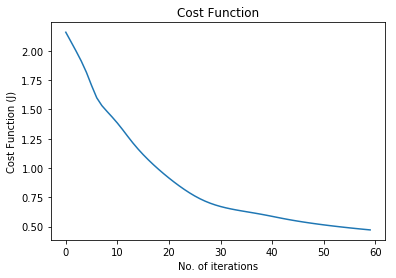

<Figure size 432x288 with 0 Axes>

In [13]:
plt.plot(np.arange(60),q)
plt.title('Cost Function')
plt.xlabel("No. of iterations")
plt.ylabel('Cost Function (J)')
plt.figure()
plt.show()

In [14]:
y_train_t = np.transpose(y_train)
y_train_t.shape

(112, 3)

In [15]:
J_test = 0
m_test = X_test.shape[1]
m_test

38

In [16]:
# TEST SET
parameters['A_new'+str(0)] = X_test
for i in range(1,3):
    parameters['Z_new'+str(i)] = np.dot(parameters['W'+str(i)],parameters['A_new'+str(i-1)]) + parameters['b'+str(i)]
    parameters['A_new'+str(i)] = np.tanh(parameters['Z_new'+str(i)])

parameters['Z_new'+str(3)] = np.dot(parameters['W'+str(3)],parameters['A_new'+str(2)]) + parameters['b'+str(3)]
parameters['A_new'+str(3)] = softmax(parameters['Z_new'+str(3)])
J_test = -(1/m_test) * sum(sum(y_test * np.log(parameters['A_new'+str(3)])))


In [17]:
y_test_t = np.transpose(y_test)
y_test_t.shape

(38, 3)

In [18]:
y_pred = parameters['A_new'+str(3)]
y_pred = np.transpose(y_pred)
y_pred.shape

(38, 3)

In [19]:
y_pred = (y_pred == y_pred.max(axis=1)[:,None]).astype(int)

In [20]:
from sklearn.metrics import accuracy_score,f1_score
print('Accuracy : {}'.format(accuracy_score(y_test_t,y_pred)))
print('f1 score(Micro) : {}'.format(f1_score(y_test_t,y_pred,average = 'micro')))
print('f1 score(Macro) : {}'.format(f1_score(y_test_t,y_pred,average='macro')))

Accuracy : 0.9210526315789473
f1 score(Micro) : 0.9210526315789473
f1 score(Macro) : 0.9178981937602627
